In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

 Image shape :  (225, 224, 3)


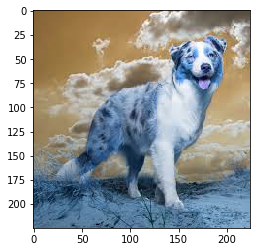

 Image shape :  (191, 264, 3)


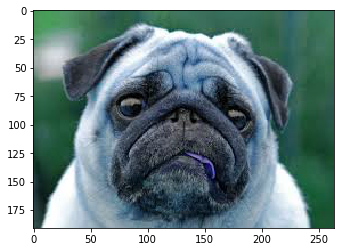

 Image shape :  (195, 259, 3)


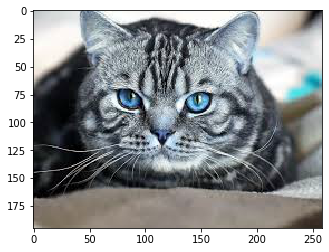

 Image shape :  (160, 315, 3)


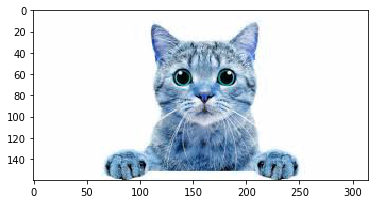

 Image shape :  (225, 224)


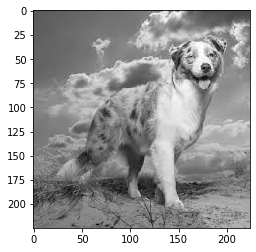

 Image shape :  (191, 264)


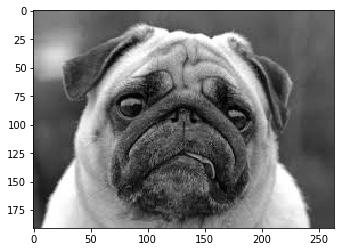

 Image shape :  (195, 259)


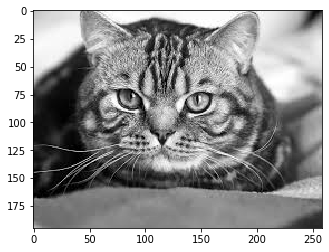

 Image shape :  (160, 315)


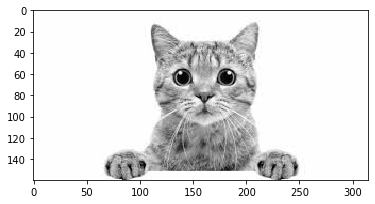

In [2]:
DATADIR ="C:/Users/LattePanda/Downloads/PetImages"  # Dog 및 Cat 폴더에 데이터 저장되어 있어야 함.
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        print(" Image shape : ", img_array.shape)
        plt.imshow(img_array)
        plt.show()
        
   

    
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        print(" Image shape : ", img_array.shape)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
       
     
    

In [3]:
IMG_SIZE = 50
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
           



In [4]:
create_training_data()

print(len(training_data))
print(" before shffle : \n", training_data) 


import random
random.shuffle(training_data)
print(" after shffle : \n", training_data)


100%|██████████| 2/2 [00:00<00:00, 667.83it/s]


4
 before shffle : 
 [[array([[ 89,  91,  91, ...,  75,  76,  76],
       [ 89,  91,  93, ...,  83,  84,  84],
       [ 91,  93,  94, ..., 101, 128, 107],
       ...,
       [130, 125, 122, ..., 153, 132, 163],
       [108, 120, 124, ..., 164, 167, 133],
       [117, 122, 106, ..., 175, 164, 172]], dtype=uint8), 0], [array([[120, 125, 127, ..., 104, 104, 104],
       [121, 126, 127, ..., 103, 103, 104],
       [123, 127, 127, ..., 100, 102, 106],
       ...,
       [ 66,  53, 251, ...,  66,  67,  67],
       [ 69,  70, 255, ...,  68,  68,  68],
       [ 73, 146, 253, ...,  66,  68,  68]], dtype=uint8), 0], [array([[196, 204, 211, ..., 104,  22,  32],
       [200, 209, 216, ...,  78,  27,  91],
       [209, 215, 218, ...,  65,  82, 139],
       ...,
       [114, 107, 109, ...,  71,  59,  49],
       [120, 111, 107, ...,  47,  43,  44],
       [162, 127, 113, ...,  41,  38,  40]], dtype=uint8), 1], [array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
 

In [19]:
X = []
Y = []

for feature, label in training_data:
    X.append(feature)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE*IMG_SIZE)
Y = np.array(Y)



print(X.shape)
print(Y.shape)

print(X)
print(Y)
Y_one_hot = np.eye(2)[Y]
print(Y_one_hot)

(4, 2500)
(4,)
[[254 254 254 ... 254 254 254]
 [ 89  91  91 ... 175 164 172]
 [196 204 211 ...  41  38  40]
 [120 125 127 ...  66  68  68]]
[1 0 1 0]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [20]:
x_data = X/255.
print(x_data)
y_data = Y_one_hot
x_data = np.array(x_data).reshape(-1, 2500)
#y_data = np.array(y_data).reshape(-1, 2)

print(x_data.shape)
print(y_data.shape)

X = tf.placeholder("float", [None, 2500])
Y = tf.placeholder("float", [None, 2])
nb_classes = 2

W = tf.Variable(tf.random_normal([2500, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis+1e-10), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(4001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

   # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X:  x_data})
    print(a, sess.run(tf.argmax(a, 1)))

[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.34901961 0.35686275 0.35686275 ... 0.68627451 0.64313725 0.6745098 ]
 [0.76862745 0.8        0.82745098 ... 0.16078431 0.14901961 0.15686275]
 [0.47058824 0.49019608 0.49803922 ... 0.25882353 0.26666667 0.26666667]]
(4, 2500)
(4, 2)
0 10.734355
200 0.013640247
400 0.0056020515
600 0.003519838
800 0.0025650007
1000 0.0020174407
1200 0.0016623397
1400 0.0014135144
1600 0.0012294031
1800 0.001087765
2000 0.0009753995
2200 0.0008840278
2400 0.00080830127
2600 0.0007445306
2800 0.0006901324
3000 0.00064309087
3200 0.0006020925
3400 0.0005660026
3600 0.00053394085
3800 0.00050532504
4000 0.00047969254
[[6.8612007e-04 9.9931383e-01]
 [9.9924821e-01 7.5174350e-04]
 [8.9508876e-07 9.9999905e-01]
 [9.9952078e-01 4.7927076e-04]] [1 0 1 0]


In [18]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6]]
y_data = [[0, 0, 1],
          [1, 0, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [0, 0, 1]]
x_data = np.array(x_data).reshape(-1, 4)
y_data = np.array(y_data).reshape(-1, 3)

print(x_data.shape)
print(y_data.shape)

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(4001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

    print('--------------')

    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')

    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')

    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')

    all = sess.run(hypothesis, feed_dict={
                   X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))


(6, 4)
(6, 3)
0 6.547381
200 0.19288142
400 0.11781502
600 0.08367262
800 0.064478435
1000 0.052284997
1200 0.043892723
1400 0.037780985
1600 0.033139694
1800 0.029499551
2000 0.026570683
2200 0.024164565
2400 0.02215373
2600 0.020448744
2800 0.018985163
3000 0.017715367
3200 0.01660353
3400 0.015621972
3600 0.014749204
3800 0.013968154
4000 0.01326519
--------------
[[1.7582092e-01 8.8545674e-17 8.2417905e-01]] [2]
--------------
[[9.9819404e-01 3.5749693e-08 1.8059269e-03]] [0]
--------------
[[1.5778007e-05 2.5640123e-02 9.7434413e-01]] [2]
--------------
[[1.7582092e-01 8.8545674e-17 8.2417905e-01]
 [9.9819404e-01 3.5749625e-08 1.8059243e-03]
 [1.5778007e-05 2.5640123e-02 9.7434413e-01]] [2 0 2]
